# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#gather">Gathering Data</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>    
<li><a href="#store">Storing Data</a></li>
<li><a href="#analyze">Analyzing and Visualizing Data</a></li>
</ul>

<a id='gather'></a>
## Gathering Data
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# import the required packages
import pandas as pd
import numpy as np
import requests
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from functools import reduce
from scipy import stats

# set default style and color for the graphs
sns.set_style("ticks")
sns.set_palette("colorblind")

In [2]:
# load the .csv file into a dataframe
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# load the .tsv file from internet to a dataframe
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
df_image = pd.read_csv(url.split('/')[-1], sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_archive is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
# load the json file into a dataframe
df_json = pd.read_json('tweet-json.txt',lines=True)

<a id='assess'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
# view the dataframe
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
# view the dataframe
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
# view the dataframe
df_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [8]:
# view the dataframe in detail
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
# view the dataframe in detail
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
# view the dataframe in detail
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [11]:
# check the dog name column
df_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [12]:
# check the numerator part of the rating
df_archive.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [13]:
# check the denominator part of the rating
df_archive.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

### Quality issues
1. Division by zero error: 960/0 rating instead of 13/10. 

2. There are some retweets in df_archive.

3. There are some images in df_image that are not classified as that of a dog.

4. Only original tweets with dog image should be considered for further analysis. There are some records that don't fall into this category.

5. Rating is not standardized. In other words, rating_denominator is not the same (10) for all records in df_archive.

6. Name column in df_archive contains words other than a dog's name or 'None'.

7. Erroneous datatype for timestamp in df_achive.

8. Some incorrect ratings created by the program that extracted the ratings from the tweets:
    - 7/11 instead of 10/10
    - 9/11 instead of 14/10
    - 26/10 instead of 11.26/10
    - 27/10 instead of 11.27/10
    - 75/10 instead of 9.75/10
    - 24/7 for no rating provided
    
    

### Tidiness issues
1. One variable (i.e. rating) in two columns (rating_numerator and rating_denominator) in df_archive.

2. One variable (i.e. dog stage) in four columns (doggo, floofer, pupper, puppo) in df_archive.

3. retweet_count and favorite_count columns should be part of df_archive.

<a id='clean'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [14]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_json_clean = df_json.copy()

### Issue #1:  Division by zero error: 960/0 rating instead of 13/10.

#### Define
Replace numerator and denominator values with 13 and 10 respectively if the values are 960 and 0.

#### Code

In [15]:
# replace numerator rating value with 13 if 960
df_archive_clean.rating_numerator = df_archive_clean.rating_numerator.replace(960, 13)

# replace denominator rating value with 10 if 0
df_archive_clean.rating_denominator = df_archive_clean.rating_denominator.replace(0, 10)

#### Test

In [16]:
# check any record exist with numerator rating of 960
df_archive_clean[df_archive_clean['rating_numerator'] == 960]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [17]:
# check any record exist with denominator rating of 0
df_archive_clean[df_archive_clean['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2:  One variable (i.e. rating) in two columns (rating_numerator and rating_denominator) in df_archive.

#### Define
Create a new 'rating' column by dividing rating_numerator by rating_denominator column values. Then drop the two columns from the table.

#### Code

In [18]:
# create a new rating column from the 'rating_numerator' and 'rating_denominator'
df_archive_clean['rating'] = df_archive_clean['rating_numerator'] / df_archive_clean['rating_denominator']

# drop the 'rating_numerator' and 'rating_denominator' columns
df_archive_clean = df_archive_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1)

#### Test

In [19]:
# make sure 1 column is created and 2 columns are dropped
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  name                        2356 non-null   object 
 11  doggo                       2356 non-null   object 
 12  floofer                     2356 non-null   object 
 13  pupper                      2356 

In [20]:
# check the values in the new column
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,1.2


### Issue #3:  One variable (i.e. dog stage) in four columns (doggo, floofer, pupper, puppo) in df_archive.

#### Define
Replace 'None' with empty string in four columns (doggo, floofer, pupper, puppo) and combine into a new single column 'dog_stage'. The new column will contain one of the four values for the stage. Separate multiple stages by comma. Drop the four original columns.

#### Code

In [21]:
# replace 'None' with empty string
df_archive_clean.doggo.replace('None', '', inplace=True)
df_archive_clean.floofer.replace('None', '', inplace=True)
df_archive_clean.pupper.replace('None', '', inplace=True)
df_archive_clean.puppo.replace('None', '', inplace=True)

# merge all four columns into a single column
df_archive_clean['dog_stage'] = df_archive_clean.doggo + df_archive_clean.floofer + df_archive_clean.pupper + df_archive_clean.puppo

# handle multiple stages
df_archive_clean.loc[df_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_archive_clean.loc[df_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_archive_clean.loc[df_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# replace empty string with NaN
df_archive_clean.loc[df_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

# drop the original four columns
df_archive_clean = df_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)        

#### Test

In [22]:
# make sure 1 column is created and 4 columns are dropped
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  name                        2356 non-null   object 
 11  rating                      2356 non-null   float64
 12  dog_stage                   380 non-null    object 
dtypes: float64(5), int64(1), object(7

In [23]:
# check the value count for the new column
df_archive_clean.dog_stage.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

### Issue #4: retweet_count and favorite_count columns should be part of df_archive.

#### Define
Rename 'id' column in df_json to 'tweet_id' and use it to merge columns 'created_at', 'retweet_count' and 'favorite_count' with df_archive. Even though 'created_at' is not identified as a mandatory column in this issue, it will be used later.

#### Code

In [24]:
# rename the 'id' column
df_json_clean.rename(columns={'id': 'tweet_id'}, inplace = True)

# select the columns to merge 
df_json_clean_trunc = df_json_clean[['tweet_id', 'created_at', 'retweet_count', 'favorite_count']]

# list the dataframes to merge
dfs = [df_archive_clean, df_json_clean_trunc]

# merge the dataframes
df_new = reduce(lambda left, right: pd.merge(left, right, on=['tweet_id']), dfs)

#### Test

In [25]:
# make sure the required columns are merged
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2354 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2354 non-null   object             
 4   source                      2354 non-null   object             
 5   text                        2354 non-null   object             
 6   retweeted_status_id         179 non-null    float64            
 7   retweeted_status_user_id    179 non-null    float64            
 8   retweeted_status_timestamp  179 non-null    object             
 9   expanded_urls               2295 non-null   object             
 10  name                        2354 non-null   object          

In [26]:
# check the values in the merged columns
df_new.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,rating,dog_stage,created_at,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,2017-08-01 16:23:56+00:00,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,2017-08-01 00:17:27+00:00,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,2017-07-31 00:18:03+00:00,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,2017-07-30 15:58:51+00:00,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,2017-07-29 16:00:24+00:00,9774,41048


### Issue #5:  There are some retweets in df_archive.

#### Define
From the df_new, which is the newer version of df_archive, select only the records(rows) where the 'retweeted_status_id' is null. Drop all columns related to retweets.

#### Code

In [27]:
# select only the non-retweeted tweets
df_new = df_new.loc[df_new['retweeted_status_id'].isnull()]

# drop all retweets related columns
df_new = df_new.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

#### Test

In [28]:
# make sure the columns are dropped
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   object             
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   name                   2175 non-null   object             
 8   rating                 2175 non-null   float64            
 9   dog_stage              344 non-null    object             
 10  created_at             2175 non-null   datetime64[ns, UTC]
 11  retweet_count          2175 non-null   int64            

### Issue #6: There are some images in df_image that are not classified as that of a dog.¶

#### Define
From the df_image, select only the rows where at least one of the algorithms identified the image as a dog image i.e. one of 'p1_dog' or 'p2_dog' or 'p3_dog' is True. 

#### Code

In [29]:
# select only rows with at least 1 dog image prediction by the algorithm
df_image_clean = df_image_clean.loc[df_image_clean.p1_dog | df_image_clean.p2_dog | df_image_clean.p3_dog]

#### Test

In [30]:
# make sure the number of rows got reduced
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


In [31]:
# check to see if there is non dog image identified by any of the algorithm
df_image_clean[(df_image_clean['p1_dog']==False) & (df_image_clean['p2_dog']==False) & (df_image_clean['p3_dog']==False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #7: Only original tweets with dog image should be considered for further analysis. There are some records that don't fall into this category.

#### Define
df_new has retweets removed and df_image_clean has non-dog images removed. Combine these two dataframes to get only original tweets with dog images.

#### Code

In [32]:
# list the dataframes to merge
dfs = [df_new, df_image_clean]

# merge the dataframes
df = reduce(lambda left, right: pd.merge(left, right, on=['tweet_id']), dfs)

#### Test

In [33]:
# check the columns from the two dataframes are combined
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1686 non-null   int64              
 1   in_reply_to_status_id  20 non-null     float64            
 2   in_reply_to_user_id    20 non-null     float64            
 3   timestamp              1686 non-null   object             
 4   source                 1686 non-null   object             
 5   text                   1686 non-null   object             
 6   expanded_urls          1686 non-null   object             
 7   name                   1686 non-null   object             
 8   rating                 1686 non-null   float64            
 9   dog_stage              260 non-null    object             
 10  created_at             1686 non-null   datetime64[ns, UTC]
 11  retweet_count          1686 non-null   int64            

### Issue #8: Rating is not standardized. In other words, rating_denominator is not the same (10) for all records in df_archive.

#### Define
'rating_numerator' and 'rating_denominator' were already combined to form a new column 'rating'. Multiply the values in 'rating' by 10 to get standardize rating out of 10.

#### Code

In [34]:
# multiply rating with 10 to standardize it
df.rating = df.rating * 10

#### Test

In [35]:
# check the new value counts of the 'rating' column
df.rating.value_counts()

12.000000    426
11.000000    362
10.000000    362
13.000000    229
9.000000     133
8.000000      68
7.000000      31
14.000000     23
6.000000      16
5.000000      15
4.000000       6
3.000000       5
2.000000       3
6.363636       1
8.181818       1
27.000000      1
75.000000      1
34.285714      1
0.000000       1
26.000000      1
Name: rating, dtype: int64

### Issue #9: Name column in df_archive contains words other than a dog's name or 'None'.

#### Define
Use regex to replace all names starting with small alphabets [a-z] with 'None'.

#### Code

In [36]:
# replace name starting with [a-z] with 'None'
df['name'] = df['name'].str.replace(r'^[a-z]+', 'None', regex = True)

#### Test

In [37]:
# check the value counts of the 'name' column
df.name.value_counts()

None          499
Lucy           10
Cooper         10
Charlie        10
Oliver          9
             ... 
Klein           1
DonDon          1
Chevy           1
Philbert        1
Christoper      1
Name: name, Length: 834, dtype: int64

### Issue #10: Erroneous datatype for timestamp in df_achive.

#### Define
'timestamp' and 'created_at' are identical columns except that 'timestamp' is in incorrect datatype. Drop this column and keep only 'created_at'.

#### Code

In [38]:
# drop the timestamp column
df = df.drop('timestamp', axis = 1)

#### Test

In [39]:
# make sure the 'timestamp' column is dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1686 non-null   int64              
 1   in_reply_to_status_id  20 non-null     float64            
 2   in_reply_to_user_id    20 non-null     float64            
 3   source                 1686 non-null   object             
 4   text                   1686 non-null   object             
 5   expanded_urls          1686 non-null   object             
 6   name                   1686 non-null   object             
 7   rating                 1686 non-null   float64            
 8   dog_stage              260 non-null    object             
 9   created_at             1686 non-null   datetime64[ns, UTC]
 10  retweet_count          1686 non-null   int64              
 11  favorite_count         1686 non-null   int64            

### Issue #11: Some incorrect ratings created by the program that extracted the ratings from the tweets:

- 7/11 instead of 10/10
- 9/11 instead of 14/10
- 26/10 instead of 11.26/10
- 27/10 instead of 11.27/10
- 75/10 instead of 9.75/10
- 24/7 for no rating provided

#### Define

- 7/11 instead of 10/10 -> since the standardization process changed the rating to 6.36, replace it with 10.
- 9/11 instead of 14/10 -> since the standardization process changed the rating to 8.18, replace it with 14.
- 26/10 instead of 11.26/10 -> replace the rating 26 with 11.26
- 27/10 instead of 11.27/10 -> replace the rating 27 with 11.27
- 75/10 instead of 9.75/10 -> replace the rating 75 with 9.75
- 24/7 for no rating provided -> the standardization process changed the rating to 34.29. Since there is no rating, drop this row.


#### Code

In [40]:
# set the 'rating' column decimal to 2 places
df['rating'] = df['rating'].apply(lambda x: round(x,2))

# replace the ratings as defined
df.rating = df.rating.replace(6.36, 10)
df.rating = df.rating.replace(8.18, 14)
df.rating = df.rating.replace(26, 11.26)
df.rating = df.rating.replace(27, 11.27)
df.rating = df.rating.replace(75, 9.75)

# drop the row with rating 34.29. There is actually no rating for this row'
df = df.query('rating != 34.29')

#### Test

In [41]:
# check the value counts of the 'rating' column
df.rating.value_counts()

12.00    426
10.00    363
11.00    362
13.00    229
9.00     133
8.00      68
7.00      31
14.00     24
6.00      16
5.00      15
4.00       6
3.00       5
2.00       3
9.75       1
11.27      1
0.00       1
11.26      1
Name: rating, dtype: int64

In [42]:
# check the final count of records
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1685
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1685 non-null   int64              
 1   in_reply_to_status_id  20 non-null     float64            
 2   in_reply_to_user_id    20 non-null     float64            
 3   source                 1685 non-null   object             
 4   text                   1685 non-null   object             
 5   expanded_urls          1685 non-null   object             
 6   name                   1685 non-null   object             
 7   rating                 1685 non-null   float64            
 8   dog_stage              260 non-null    object             
 9   created_at             1685 non-null   datetime64[ns, UTC]
 10  retweet_count          1685 non-null   int64              
 11  favorite_count         1685 non-null   int64            

<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [43]:
# save the wrangled data to a .csv file
df.to_csv('twitter_archive_master.csv', index = False)

<a id='analyze'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [44]:
# read the stored dataset
df = pd.read_csv('twitter_archive_master.csv')

In [45]:
# check 'rating' in more detail
df.rating.describe()

count    1685.000000
mean       10.826872
std         1.795712
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating, dtype: float64

In [46]:
# check how the ratings are distributed
df.rating.value_counts()

12.00    426
10.00    363
11.00    362
13.00    229
9.00     133
8.00      68
7.00      31
14.00     24
6.00      16
5.00      15
4.00       6
3.00       5
2.00       3
9.75       1
11.27      1
0.00       1
11.26      1
Name: rating, dtype: int64

In [47]:
# get the list of dogs that are top rated @ 14.00

# create a slice of the dataframe with only top rated dogs
top_rated = df.query('rating == 14.00')

# create an empty list
top_rated_dog_list = []

# function to get the correct breed of the dog
def get_top_rated(top_rated):
    if top_rated['p1_dog'] is True:
        top_rated_dog_list.append(top_rated['p1'])
    else:
        top_rated_dog_list.append(top_rated['p2'])

# call the function to get the dog's breed
top_rated.apply(get_top_rated, axis = 1)

# convert the list of top rated dogs to a dataframe
df_top_rated = pd.DataFrame(sorted(top_rated_dog_list))

# get the value counts of the top rated dogs
df_top_rated.value_counts()

Pembroke                   4
golden_retriever           3
French_bulldog             3
Bedlington_terrier         1
bloodhound                 1
black-and-tan_coonhound    1
Samoyed                    1
Rottweiler                 1
Pomeranian                 1
Old_English_sheepdog       1
Chihuahua                  1
Lakeland_terrier           1
Labrador_retriever         1
Irish_setter               1
Gordon_setter              1
Eskimo_dog                 1
standard_poodle            1
dtype: int64

In [48]:
# calculate correlation coefficient and p-value for 'favorite_count' and 'retweet_count'
stats.pearsonr(df['favorite_count'], df['retweet_count'])

(0.9131725168919087, 0.0)

### Insights:
1. The ratings range from 0 to 14 with a mean of 10.8 and standard deviation of 1.8. With a median rating of 11, which is slightly higher than the mean, the distribution of ratings is left skewed. The left skewness is also confirmed by the more number of dogs rated on the higher end of the scale (62% of the dogs received a rating of 11 or higher).


2. The top 24 dogs that were rated 14 belong to the following breeds:

|Breed|Count|
|---|---|
|Pembroke|4|
|Golden retriever|3|
|French bulldog|3|
|Bedlington terrier|1|
|Bloodhound|1|
|Black-and-tan coonhound|1|
|Samoyed|1|
|Rottweiler|1|
|Pomeranian|1|
|Old English sheepdog|1|
|Chihuahua|1|
|Lakeland terrier|1|
|Labrador retriever|1|
|Irish setter|1|
|Gordon setter|1|
|Eskimo dog|1|
|Standard poodle|1|


3. In general, the favorite count and retweet count increase as the rating increases. Between favorite count and retweet count, there is a strong positive correlation with a correlation coefficient of 0.91.

### Visualization

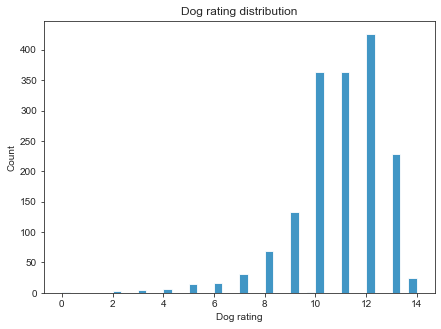

In [49]:
# Plot an histogram showing distribution of dog rating

f, axes = plt.subplots(figsize = (7, 5))

# set the title and the labels
props = {
    'title': 'Dog rating distribution',
    'xlabel': 'Dog rating',
    'ylabel': 'Count'
}
axes.set(**props)

# plot the graph 
sns.histplot(
    data = df, 
    x = 'rating'
);

As seen from the above graph, the distribution of dog rating is left skewed.

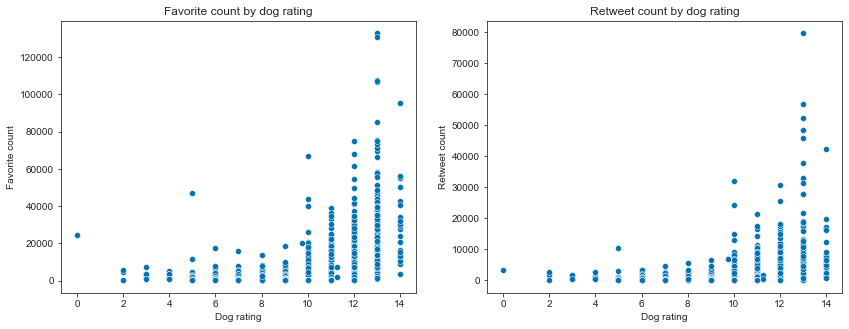

In [50]:
# Plot scatter plots showing how the favorite_count and retweet_count change by dog rating

f, axes = plt.subplots(1, 2, figsize = (14, 5))

# plot the favorite count scatter plot
sns.scatterplot(
    ax = axes[0],
    data = df,
    x = "rating", 
    y = "favorite_count" 
)

# set the title and labels
axes[0].set_title("Favorite count by dog rating")
axes[0].set_xlabel("Dog rating")
axes[0].set_ylabel("Favorite count")

# plot the retweet count scatter plot
sns.scatterplot(
    ax = axes[1],
    data = df,
    x = "rating", 
    y = "retweet_count" 
)

# set the title and labels
axes[1].set_title("Retweet count by dog rating")
axes[1].set_xlabel("Dog rating")
axes[1].set_ylabel("Retweet count");

From the above graphs, it is clear that the favorite count and retweet count increase as the rating increases.

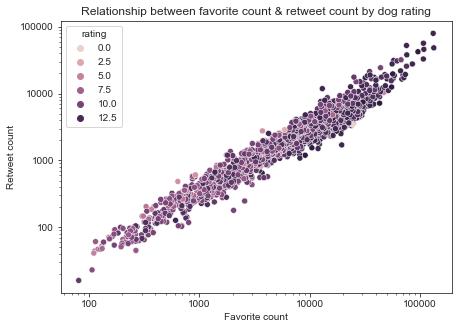

In [51]:
# Plot a scatterplot showing the realtionship between favorite_count and retweet_count by dog rating

f, axes = plt.subplots(figsize = (7, 5))

# set the x-axis to log scale
axes = plt.gca()
axes.set_xscale('log', base = 10)
axes.set_yscale('log', base = 10)
plt.xticks([10**i for i in range(8)],[10**i for i in range(8)])
plt.yticks([10**i for i in range(8)],[10**i for i in range(8)])

# set the title and the labels
props = {
    'title': 'Relationship between favorite count & retweet count by dog rating',
    'xlabel': 'Favorite count',
    'ylabel': 'Retweet count'
}
axes.set(**props)

# plot the graph
sns.scatterplot(
    data = df,
    x = "favorite_count", 
    y = "retweet_count",
    hue = "rating"
);

The favorite count and retweet count seem to have a strong positive relationship between each other as per the above graph.